In [1]:
# for data wrangling
import pandas as pd
from pandas import json_normalize

# for stats
import numpy as np
import statistics
import math
from scipy.stats import pearsonr

# for visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# for regex
import re

In [2]:
data = pd.read_csv('topics-post-RADAR-data.csv')

In [3]:
data.columns

Index(['id', 'File', 'Topic', 'Student', 'ChatGPT-3', 'ChatGPT-4',
       'GPT-4_Paraphrasing.io', 'GPT-4_Paraphrasing.io_MANUALLYCORRECTED',
       'GPT-4_Quillbot', 'GPT-4_Grammarly', 'GPT-4_WordAi', 'STUD_spacy',
       'STUD_lemma', 'GPT3_spacy', 'GPT3_lemma', 'GPT4_spacy', 'GPT4_lemma',
       'STUD_sent_count', 'GPT3_sent_count', 'GPT4_sent_count',
       'STUD_word_count', 'GPT3_word_count', 'GPT4_word_count', 'STUD_RADAR',
       'GPT3_RADAR', 'GPT4_RADAR', 'GPT4_Quillbot_RADAR',
       'GPT4_Grammarly_RADAR', 'GPT4_WordAI_RADAR',
       'GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR'],
      dtype='object')

In [4]:
melted_data = pd.melt(data, id_vars=[
    'id', 'File', 'Topic', 'Student', 'ChatGPT-3', 'ChatGPT-4',
       'GPT-4_Paraphrasing.io', 'GPT-4_Paraphrasing.io_MANUALLYCORRECTED',
       'GPT-4_Quillbot', 'GPT-4_Grammarly', 'GPT-4_WordAi', 'STUD_spacy',
       'STUD_lemma', 'GPT3_spacy', 'GPT3_lemma', 'GPT4_spacy', 'GPT4_lemma',
       'STUD_sent_count', 'GPT3_sent_count', 'GPT4_sent_count',
       'STUD_word_count', 'GPT3_word_count', 'GPT4_word_count'], 
       var_name='Category', value_name='RADAR_output')

In [5]:
melted_data.head(1)

,id,File,Topic,Student,ChatGPT-3,ChatGPT-4,GPT-4_Paraphrasing.io,GPT-4_Paraphrasing.io_MANUALLYCORRECTED,GPT-4_Quillbot,GPT-4_Grammarly,...,GPT4_spacy,GPT4_lemma,STUD_sent_count,GPT3_sent_count,GPT4_sent_count,STUD_word_count,GPT3_word_count,GPT4_word_count,Category,RADAR_output
0,0,essay01.txt,Should students be taught to compete or to coo...,It is always said that competition can effecti...,Education is not only about acquiring knowledg...,Title: Fostering Cooperation and Competition i...,Title: Promoting cooperation and competition i...,Title: Promoting cooperation and competition i...,Title: promoting cooperation and competition i...,Title: Fostering Cooperation and Competition i...,...,Title: Fostering Cooperation and Competition i...,title : foster Cooperation and Competition in ...,16,12,12,367,258,215,STUD_RADAR,0.57065


[[Text(0, 0, 'Human'),
  Text(1, 0, 'GPT3'),
  Text(2, 0, 'GPT4'),
  Text(3, 0, 'Quillbot'),
  Text(4, 0, 'Grammarly'),
  Text(5, 0, 'WordAI'),
  Text(6, 0, 'Para Raw'),
  Text(7, 0, 'Para Edited')]]

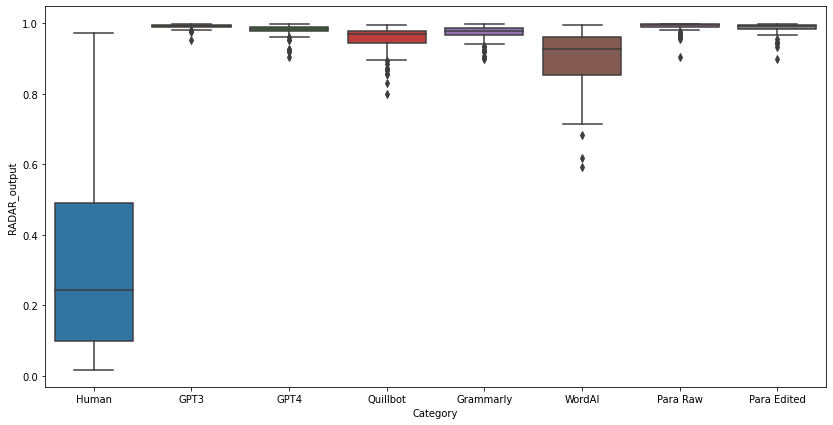

In [9]:
plt.figure(figsize=(14, 7)) 
g = sns.boxplot(data=melted_data, y='RADAR_output', x='Category')
g.set(xticklabels=['Human', 'GPT3', 'GPT4', 'Quillbot', 
                   'Grammarly', 'WordAI', 'Para Raw',
                   'Para Edited'])
